# 6.4 Supervised Machine Learning
## Script Content
#### 01 importing libraries
#### 02 importing data sets
#### 03 data cleaning
#### 04 Data prep for regression analysis
#### 05 Regression analysis
#### 06 Reflections on Data Bias and Impact:

## 01 importing libraries

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## 02 importing data sets

In [2]:
df = pd.read_csv(r"C:\Users\pshan\Downloads\part 6\Data\Produced Data set\world_happiness.csv")

In [3]:
# printing the data (head and tail)
df

,country,happiness_rank,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [56]:
df.shape

(782, 10)

In [ ]:
Countries with higher GDP per capita tend to have higher happiness scores

In [4]:
df.columns

Index(['country', 'happiness_rank', 'happiness_score',
       'economy_(gdp_per_capita)', 'family', 'health_(life_expectancy)',
       'freedom', 'trust_(government_corruption)', 'generosity', 'year'],
      dtype='object')

## 03 Data Cleaning

In [32]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

country                          0
happiness_rank                   0
happiness_score                  0
economy_(gdp_per_capita)         0
family                           0
health_(life_expectancy)         0
freedom                          0
trust_(government_corruption)    1
generosity                       0
year                             0
dtype: int64

In [53]:
# checking for duplicates
dups = df.duplicated()

In [55]:
dups.shape

(782,)

### Hypothesis

##### Countries with higher GDP per capita tend to have higher happiness scores

## 04 Data prep for Regression Analysis

In [57]:
# Extract independent variable (X) and dependent variable (y)
X = df['economy_(gdp_per_capita)'].values.reshape(-1, 1)  # Reshaping to 2D array
y = df['happiness_score'].values.reshape(-1, 1)

In [58]:
# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 05 Regression Analysis

In [59]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#### Scatter plot with the regression line

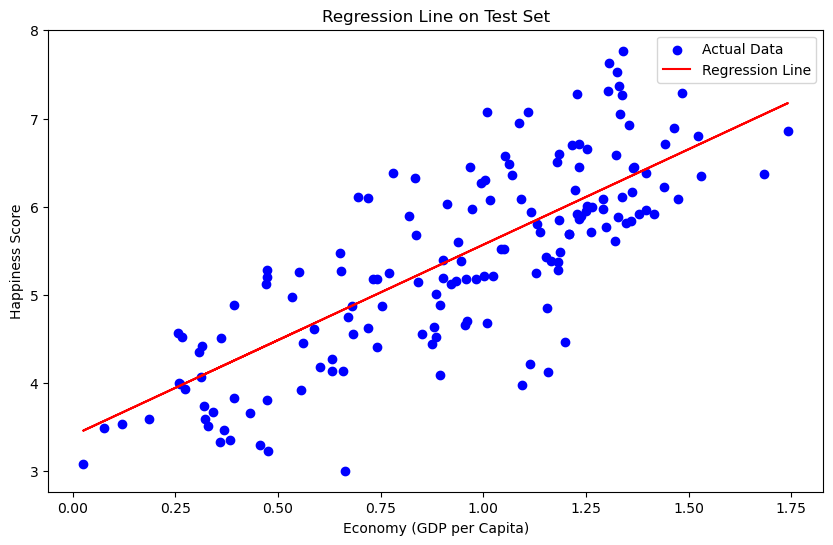

In [61]:
# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

### Observations:
#### 1.	Fit to Data:
##### The line appears to pass through the central trend of the data points, indicating that the model captures the overall relationship fairly well However, there is noticeable scatter around the line, particularly for GDP values below 0.5 and above 1.0, suggesting variability in happiness scores that GDP alone cannot explain.
#### 2.Strength of the Relationship:
##### The data points are not tightly clustered around the line, which could indicate a moderate correlation rather than a strong one. External factors like health, family, or freedom might also influence happiness scores and contribute to the observed variability.
#### 3.	Potential Outliers:
##### There are a few points significantly distant from the regression line, which could indicate outliers or additional influences beyond GDP.


In [62]:
y_pred

array([[4.07151052],
       [5.2965968 ],
       [5.51100854],
       [5.91240828],
       [5.75879631],
       [4.08215968],
       [4.59747512],
       [6.39196679],
       [5.47256767],
       [6.57315567],
       [6.42923885],
       [5.30741912],
       [5.35601132],
       [6.30523674],
       [3.99791876],
       [4.84032792],
       [6.59527483],
       [5.43791461],
       [5.21118707],
       [5.58836646],
       [6.01980895],
       [6.52220255],
       [5.07240168],
       [6.22948052],
       [6.69886605],
       [5.97038443],
       [5.96541599],
       [4.83235553],
       [4.98615456],
       [5.55923279],
       [4.88101983],
       [5.39730928],
       [3.96921798],
       [4.11579544],
       [5.17755131],
       [4.43081144],
       [5.97296996],
       [4.96110497],
       [6.52521968],
       [6.27060533],
       [4.56284371],
       [4.43514037],
       [3.98218311],
       [6.36584172],
       [6.34740049],
       [4.18189815],
       [6.71783445],
       [5.577

In [63]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_pred) # This is the mean squared error
r2 = r2_score(y_test, y_pred) # This is the R2 score. 

#### Model Performance Statistics

In [64]:
# Print the model summary statistics.

print('Slope:' ,model.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16446339]]
Mean squared error:  0.46366409551564863
R2 score:  0.6188158513743292


### Slope
#### The slope of 2.164 indicates a significant positive relationship between GDP per capita and happiness scores. For every unit increase in GDP per capita, the model predicts an increase of approximately 2.164 in the happiness score.
### MSE
#### The MSE of 0.464 indicates that, on average, the model's predictions deviate from the actual happiness scores by a moderate amount. While the error is not negligible, it suggests the model performs reasonably well.
### R2 score
#### The R² score of 0.62 means that about 62% of the variance in happiness scores can be explained by GDP per capita. This indicates a fairly strong relationship but also suggests that 37.7% of the variance is due to other factors not captured by the model.

In [65]:
y_pred

array([[4.07151052],
       [5.2965968 ],
       [5.51100854],
       [5.91240828],
       [5.75879631],
       [4.08215968],
       [4.59747512],
       [6.39196679],
       [5.47256767],
       [6.57315567],
       [6.42923885],
       [5.30741912],
       [5.35601132],
       [6.30523674],
       [3.99791876],
       [4.84032792],
       [6.59527483],
       [5.43791461],
       [5.21118707],
       [5.58836646],
       [6.01980895],
       [6.52220255],
       [5.07240168],
       [6.22948052],
       [6.69886605],
       [5.97038443],
       [5.96541599],
       [4.83235553],
       [4.98615456],
       [5.55923279],
       [4.88101983],
       [5.39730928],
       [3.96921798],
       [4.11579544],
       [5.17755131],
       [4.43081144],
       [5.97296996],
       [4.96110497],
       [6.52521968],
       [6.27060533],
       [4.56284371],
       [4.43514037],
       [3.98218311],
       [6.36584172],
       [6.34740049],
       [4.18189815],
       [6.71783445],
       [5.577

In [66]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data.head(30)

,Actual,Predicted
0,4.350,4.071511
1,4.441,5.296597
2,5.976,5.511009
3,4.121,5.912408
4,6.952,5.758796
5,4.073,4.082160
6,5.261,4.597475
7,5.921,6.391967
8,4.655,5.472568
9,6.891,6.573156


## 06 Reflections on Data Bias and Impact:
### 1.	Data Bias:
#### Regional Representation: If the dataset overrepresents countries with high or low GDP per capita (e.g., developed vs. developing nations), the model might overemphasize trends within these groups and fail to generalize globally.
#### Cultural Factors: Happiness scores may be influenced by cultural or societal norms, which might not correlate directly with GDP. Bias in how happiness is reported across countries could skew the relationship.
#### Yearly Trends: The dataset spans multiple years (2015–2019), during which global events like economic recessions or political changes might have influenced happiness differently for different countries. Ignoring this temporal aspect may introduce bias.
### 2.Potential Improvements:
#### Include additional predictors like health, family, or freedom to better capture the multifactorial nature of happiness. Analyze the relationship for individual years to check if the impact of GDP varies over time. Investigate and address potential outliers that might disproportionately affect the regression line.
### 3. Real-World Implications:
#### While GDP per capita is a good predictor, the unexplained variance highlights that well-being is multidimensional. Solely focusing on economic growth may not fully address the factors contributing to national happiness.
##### In summary, the model performed reasonably well on the test set, capturing a meaningful relationship between GDP per capita and happiness scores. However, addressing potential data biases and adding more variables would likely enhance its explanatory power.
